# **Teorija baza podataka - Projekt**
## **Autor: Maksim Kos**
### **Tema:** *Aplikacija za analizu velikih količina podataka (NoSQL, map/reduce) - polustrukturirane baze podataka - CouchDB/MongoDB/Redis ili sl. + sučelje na neki tablični kalkulator (npr. Jupyter Notebook, LibreOffice Calc ili Gnumeric)*
---

# Uvod

Na početku je potrebno prikupiti podatke koji će se koristiti u projektu. U ovom projektu se konkretno koristi skup podataka o pjesmama sa Spotifya.

Skup podataka nalazi se na sljedećem linku: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

Ovaj skup podataka izabran je iz razloga što sadrži velik broj pjesama pokrivajuči preko 125 različitih žanrova.

Kasnije će biti uklučjen još jedan skup podataka - skup podataka koji sadrži tekst pojedinih pjesama. Više o njemu u nastavku. Ovaj skup podataka nalazi se na sljedećem linku: https://www.kaggle.com/datasets/evabot/spotify-lyrics-dataset

Na početku je potrebno učitati podatke, provjeriti ih, te počititi ukoliko je to potrebno. Za rad sa .csv datotekama koristi se `pandas` biblioteka

In [15]:
import pandas as pd

In [16]:
# Učitavanje skupa podataka
data = pd.read_csv("data/dataset.csv")

In [17]:
# Prvih 10 redova skupa podataka
data.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [18]:
# Prikaz posljednjih 5 redova skupa podataka
data.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [19]:
# Prikaz osnovnih informacija o skupu podataka
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Prethodni ispis prikazuje kako skup podataka sadrži 21 stupac (atribut), te 114 tis. zapisa. Također se može vidjeti kako atributi `artists`, `album_name`, `track_name` sadrži jednu null vrijednost, što je potrebno pregledati.

Može se vidjeti kako skup sadrži dva atributa koji predstavljaju ID - ovo je nepotrebno te će se jedan od njih ukloniti.

Tipovi podataka:
- 1 boolean atribut
- 9 float atributa
- 6 int atributa
- 5 object (tekstualni) atributa

Prije čišćenja, potrebno je pregledati postoje li duplikati u bazi podataka

In [20]:
# Provjera duplikata
duplikati = data.duplicated().sum()
print("Broj duplikata: ", duplikati)

Broj duplikata:  0


In [21]:
# Null vrijednosti
print("Prazna polja:")
print(data.isnull().sum())

Prazna polja:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [22]:
prazni_redovi = data[data.isnull().any(axis=1)]
display(prazni_redovi)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Ovaj zapis čemo ukloniti iz skupa podataka iz razloga što nema smila imati podatke o pjesmi koja nema informacije o izvođačima, albumu i nazivu.

In [23]:
# Brisanje
data.dropna(inplace=True)

In [24]:
# Null vrijednosti
print("Prazna polja:")
print(data.isnull().sum())

Prazna polja:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

Sada kada su null vrijednosti uklonjene, potrebno je pregledati vezu između dva atributa koji predstavljlaju ID pjesme, tj. zapisa 

In [26]:
# Provjera dupliciranih vrijednosti u stupcu 'Unnamed: 0'
dup_count = data["Unnamed: 0"].duplicated().sum()
dup_count

np.int64(0)

In [27]:
# Provjera dupliciranih vrijednosti u stupcu 'track_id'
dup_count = data["track_id"].duplicated().sum()
dup_count

np.int64(24259)

Možemo vidjeti kako postoje zapisi koji sadrže jednake vrijednosti u stupcu track_id

In [28]:
dupli_id = data[data["track_id"].duplicated(keep=False)].sort_values("track_id")
dupli_id[["Unnamed: 0", "track_id", "album_name", "track_name", "duration_ms", "explicit", "track_genre"]].head(10)

,Unnamed: 0,track_id,album_name,track_name,duration_ms,explicit,track_genre
15028,15028,001APMDOl3qtx1526T11n1,New RnB,Better,176320,False,chill
103211,103211,001APMDOl3qtx1526T11n1,New RnB,Better,176320,False,soul
85578,85578,001YQlnDSduXd5LgBd66gT,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,177266,False,punk-rock
100420,100420,001YQlnDSduXd5LgBd66gT,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,177266,False,ska
91801,91801,003vvx7Niy0yvhvHt4a68B,Hot Fuss,Mr. Brightside,222973,False,rock
3257,3257,003vvx7Niy0yvhvHt4a68B,Hot Fuss,Mr. Brightside,222973,False,alternative
2106,2106,003vvx7Niy0yvhvHt4a68B,Hot Fuss,Mr. Brightside,222973,False,alt-rock
33178,33178,004h8smbIoAkUNDJvVKwkG,Loners Diary,Lovemark,219482,True,emo
94239,94239,004h8smbIoAkUNDJvVKwkG,Loners Diary,Lovemark,219482,True,sad
97533,97533,006rHBBNLJMpQs8fRC2GDe,CP 25 Anos (Ao Vivo em Aracaju),Agora Estou Sofrendo - Ao Vivo,260510,False,sertanejo


In [29]:
dupli_id.tail(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
67285,67285,7zubR9uYAWjb5KPZTMm85e,Jhayco;Anuel AA,El perreo es el futuro,Ley Seca,0,263666,False,0.759,0.843,...,-3.718,1,0.0913,0.127000,0.000000,0.1140,0.560,105.016,4,latin
89274,89274,7zubR9uYAWjb5KPZTMm85e,Jhayco;Anuel AA,El perreo es el futuro,Ley Seca,0,263666,False,0.759,0.843,...,-3.718,1,0.0913,0.127000,0.000000,0.1140,0.560,105.016,4,reggaeton
88279,88279,7zubR9uYAWjb5KPZTMm85e,Jhayco;Anuel AA,El perreo es el futuro,Ley Seca,0,263666,False,0.759,0.843,...,-3.718,1,0.0913,0.127000,0.000000,0.1140,0.560,105.016,4,reggae
82498,82498,7zumacGldlmxpoP8bpaeLe,Squeeze,Greatest Hits,Slap & Tickle,24,256839,False,0.585,0.805,...,-14.211,0,0.0344,0.007390,0.000828,0.0699,0.919,131.820,4,power-pop
107898,107898,7zumacGldlmxpoP8bpaeLe,Squeeze,Greatest Hits,Slap & Tickle,24,256839,False,0.585,0.805,...,-14.211,0,0.0344,0.007390,0.000828,0.0699,0.919,131.820,4,synth-pop
72679,72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
22326,22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
2004,2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock
3100,3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative
91401,91401,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,rock


Prethodni ispisi prikazuju kako su zapisi vezani uz žarn, tj. jedna pjesma može pripadati u više žanrova. Ovakva organizacija nije intuitivna jer se ID pjesme ponavlja vise puta, zbog čega je potrebno uvoditi novi ID

In [30]:
# Spajanje žarnova za svaki track_id
genres = (data.groupby("track_id")["track_genre"].apply(lambda x: ";".join(set(x))).reset_index())

Podaci se grupiraju po `track_id` atributu (svaki redak koji ima isti `track_id` se staljva u jednu grupu). Zatim se iz svake grupe uzima samo stupac `track_genre`. Te se svi žarnovi za jedan `track_id` spajaju na način da su razdvojeni sa `;`

In [31]:
# Uklanjanje duplikata
tracks = data.drop_duplicates("track_id")

In [32]:
# Spajanje žarnova s jedinstvenim zapisima
data_clean = tracks.merge(genres, on="track_id", how="left")

In [33]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89740 non-null  int64  
 1   track_id          89740 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89740 non-null  int64  
 6   duration_ms       89740 non-null  int64  
 7   explicit          89740 non-null  bool   
 8   danceability      89740 non-null  float64
 9   energy            89740 non-null  float64
 10  key               89740 non-null  int64  
 11  loudness          89740 non-null  float64
 12  mode              89740 non-null  int64  
 13  speechiness       89740 non-null  float64
 14  acousticness      89740 non-null  float64
 15  instrumentalness  89740 non-null  float64
 16  liveness          89740 non-null  float6

In [34]:
data_clean.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_x,track_genre_y
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,acoustic;songwriter;singer-songwriter;j-pop
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,chill;acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,acoustic


Kod spajanja podataka dobio sam dva stupca:
- `track_genre_x` - stari žanr iz originalne tablice
- `track_genre_y` - novi, ispravni žanr (svi žanrovi spojeni u jedan)

In [35]:
# Potrebno je izbrisati prethodni stupac i zadržati samo novi sa spojenim žanrovima
data_clean = data_clean.drop(columns=["track_genre_x"])
data_clean = data_clean.rename(columns={"track_genre_y": "track_genre"})
data_clean.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic;songwriter;singer-songwriter;j-pop
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,chill;acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [36]:
# Provjera dupliciranih vrijednosti u stupcu 'track_id'
data_clean_dup = data_clean["track_id"].duplicated().sum()
data_clean_dup

np.int64(0)

Nema više zapisa sa istim vrijednostima za `track_id` - možemo ukloniti stupac `Unnamed: 0`

In [37]:
data_clean.drop(columns=["Unnamed: 0"], inplace=True)


In [38]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float6

Skup podataka je sada uredan i spreman za prijenos u MongoDB bazu podataka. Međutim, MongoDB predstavlja polustrukturiranu bazu podataka, što znači da zapisi nemoraju imati ista polja. 

Stoga, kako bi se dobio bolji primjer polustrukturirane baze podataka, na trenutni skup podataka dodat će se tekst za pojedine pjesme ako on postoji

In [39]:
# Učitavanje skupa podataka s tekstovima pjesama
data_lyrics = pd.read_csv("data/lyrics_10k.csv")
data_lyrics.head()

,Unnamed: 0,song_id,artist_id,song,artists,explicit,genres,lyrics
0,0,spotify:track:1NbzT9otocflZ9d8yvA54D,spotify:artist:30TrHDLNCKQVTYWOn9QqOC,Better Than Home,['Beth Hart'],False,modern blues,Better than home Lyrics I can feel my body bre...
1,1,spotify:track:1crTf4RvraCjcPoqsaT9hd,spotify:artist:4P0dddbxPil35MNN9G2MEX,Illusions,['Cypress Hill'],True,chicano rap;gangster rap;hardcore hip hop;hip ...,Illusions Lyrics Some people tell me that I ne...
2,2,spotify:track:4AGkBc4BiGLQNBdTUmUeF3,spotify:artist:2sG4zTOLvjKG1PSoOyf5Ej,Touching the Ground,['Brandi Carlile'],False,acoustic pop;folk;indie pop;lilith;modern folk...,Touching the Ground Lyrics I swear when we tou...
3,3,spotify:track:4jtIeveEJPs8SxuVa3FV21,spotify:artist:0c173mlxpT3dSFRgMO8XPh,Nothing Is Stopping You,['Big Sean'],True,detroit hip hop;hip hop;pop;pop rap;rap;southe...,Nothing Is Stopping You Lyrics Nothing is stop...
4,4,spotify:track:5Dbr7Fy5VhSTXRbt2h3EYF,spotify:artist:4TKTii6gnOnUXQHyuo9JaD,I Shall Believe,['Sheryl Crow'],False,lilith;mellow gold;neo mellow;new wave pop;per...,I Shall Believe Lyrics Come to me now And lay ...


In [40]:
# Stvaranje novog stupca u data_clean
data_clean["lyrics"] = None

In [41]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float6

In [42]:
data_lyrics['song_id'] = data_lyrics['song_id'].str.replace('spotify:track:', '')

In [43]:
data_lyrics.head()

,Unnamed: 0,song_id,artist_id,song,artists,explicit,genres,lyrics
0,0,1NbzT9otocflZ9d8yvA54D,spotify:artist:30TrHDLNCKQVTYWOn9QqOC,Better Than Home,['Beth Hart'],False,modern blues,Better than home Lyrics I can feel my body bre...
1,1,1crTf4RvraCjcPoqsaT9hd,spotify:artist:4P0dddbxPil35MNN9G2MEX,Illusions,['Cypress Hill'],True,chicano rap;gangster rap;hardcore hip hop;hip ...,Illusions Lyrics Some people tell me that I ne...
2,2,4AGkBc4BiGLQNBdTUmUeF3,spotify:artist:2sG4zTOLvjKG1PSoOyf5Ej,Touching the Ground,['Brandi Carlile'],False,acoustic pop;folk;indie pop;lilith;modern folk...,Touching the Ground Lyrics I swear when we tou...
3,3,4jtIeveEJPs8SxuVa3FV21,spotify:artist:0c173mlxpT3dSFRgMO8XPh,Nothing Is Stopping You,['Big Sean'],True,detroit hip hop;hip hop;pop;pop rap;rap;southe...,Nothing Is Stopping You Lyrics Nothing is stop...
4,4,5Dbr7Fy5VhSTXRbt2h3EYF,spotify:artist:4TKTii6gnOnUXQHyuo9JaD,I Shall Believe,['Sheryl Crow'],False,lilith;mellow gold;neo mellow;new wave pop;per...,I Shall Believe Lyrics Come to me now And lay ...


Sada kada smo ukolinili višak teksta u stupcu `song_id`, potrebno je ukloniti višak stupaca kako bi se moglo napraviti spajanje

In [44]:
data_lyrics.drop(columns=["Unnamed: 0", "artist_id", "song", "artists", "explicit", "genres"], inplace=True)

In [45]:
# Promjena naziva stupca 'song_id' u 'track_id' radi lakšeg spajanja
data_lyrics = data_lyrics.rename(columns={"song_id": "track_id"})
data_lyrics.head()

,track_id,lyrics
0,1NbzT9otocflZ9d8yvA54D,Better than home Lyrics I can feel my body bre...
1,1crTf4RvraCjcPoqsaT9hd,Illusions Lyrics Some people tell me that I ne...
2,4AGkBc4BiGLQNBdTUmUeF3,Touching the Ground Lyrics I swear when we tou...
3,4jtIeveEJPs8SxuVa3FV21,Nothing Is Stopping You Lyrics Nothing is stop...
4,5Dbr7Fy5VhSTXRbt2h3EYF,I Shall Believe Lyrics Come to me now And lay ...


In [46]:
# Provjera istih track_id u oba skupa podataka
same_traack = set(data_clean["track_id"]) & set(data_lyrics["track_id"])
len(same_traack)

155

Možemo vidjeti kako postoji 155 zajedničkih track_id vrijednsoti iz oba skupa, stoga možemo spojiti njihov tekst

In [47]:
# Spajanje
data_clean = data_clean.merge( data_lyrics, on="track_id", how="left" )
data_clean[data_clean["lyrics_y"].notna()].head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,lyrics_x,lyrics_y
798,1Cu8QneXq0Hq1HJqkZDPbN,Brandi Carlile,In These Silent Days,This Time Tomorrow,60,206267,False,0.606,0.326,10,...,0.0294,0.841000,0.000000,0.1390,0.414,91.626,4,acoustic,None,This Time Tomorrow Lyrics When the fire inside...
2710,6PwjJ58I4t7Mae9xfZ9l9v,The Killers,Hot Fuss,Somebody Told Me,78,197200,False,0.497,0.970,10,...,0.0836,0.000090,0.000674,0.1010,0.689,138.081,4,alt-rock,None,Somebody Told Me Lyrics Breaking my back just ...
2952,70wYA8oYHoMzhRRkARoMhU,The Killers,Sam's Town,When You Were Young,77,220426,False,0.467,0.988,11,...,0.1120,0.000152,0.048400,0.2800,0.321,130.433,4,alt-rock,None,When You Were Young Lyrics You sit there in yo...
7394,2tznHmp70DxMyr2XhWLOW0,Cage The Elephant,Melophobia,Cigarette Daydreams,79,208760,False,0.636,0.676,2,...,0.0263,0.080700,0.000000,0.0831,0.273,113.980,4,rock;punk;blues;punk-rock,None,Cigarette Daydreams Lyrics Did you stand there...
7639,2udGjDmpK1dH9VGyw7nrei,Eric Clapton,Slowhand 35th Anniversary,Cocaine,69,221640,False,0.699,0.502,9,...,0.0278,0.060700,0.033700,0.3170,0.676,105.267,4,blues,None,Cocaine Lyrics If you wanna hang out You've go...
7665,1Q3t9fWvHUXKsMmpD2XpUu,Cage The Elephant,Tell Me I'm Pretty,Cold Cold Cold,69,214386,False,0.549,0.789,5,...,0.0313,0.017800,0.000067,0.0590,0.715,136.125,4,punk;blues;punk-rock,None,Translations Português Cold Cold Cold Lyrics D...
7920,6io0LJIP9ntX35hTfaxwQG,Eric Clapton,Slowhand 35th Anniversary (Super Deluxe),Lay Down Sally,62,236093,False,0.690,0.500,4,...,0.0909,0.598000,0.028800,0.1100,0.586,191.539,4,blues,None,Lay Down Sally Lyrics There is nothing that is...
7952,48sc7vBJeNoCEQhxO3zYKA,Cage The Elephant,Tell Me I'm Pretty,Too Late To Say Goodbye,60,252786,False,0.482,0.550,4,...,0.0356,0.135000,0.000000,0.2940,0.105,67.559,4,blues;punk-rock,None,Too Late To Say Goodbye Lyrics Oh my precious ...
8260,23IJ5wLRhEZ9DOuia5mPiZ,The Who,Who Are You,Who Are You,65,381626,True,0.651,0.648,9,...,0.0501,0.262000,0.004200,0.0655,0.490,156.372,4,hard-rock;psych-rock;blues;british,None,Who Are You Lyrics Who are you?Who who who ...
18777,3rXCZRMiMZp0feGcYXpwYX,The Chicks,Fly,Cowboy Take Me Away,71,287266,False,0.467,0.622,6,...,0.0310,0.365000,0.005270,0.0982,0.455,164.418,4,country,None,Cowboy Take Me Away Lyrics I said I wanna touc...


In [48]:
# Brisanje suvišnog stupca i preimenovanje
data_clean.drop(columns=["lyrics_x"], inplace=True)
data_clean = data_clean.rename(columns={"lyrics_y": "lyrics"})
data_clean.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,lyrics
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic;songwriter;singer-songwriter;j-pop,NaN
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,chill;acoustic,NaN
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,NaN
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,NaN
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,NaN


In [49]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float6

> **Sada je skup podataka spreman!**

In [50]:
# Pohrana skupa podataka u .csv file kao backup
data_clean.to_csv("data/data_clean_with_lyrics.csv", index=False)

---

### Prebacivanje podataka u MongoDB

Za rad s MongoDB u Python programskom jeziku, korisi se biblioteka pymongo
- Implementacija je napravljena pomoću primjera koji se nalazi na sljedećem linku: https://blog.bytescrum.com/reading-csv-files-and-inserting-data-into-mongodb-with-python

In [51]:
from pymongo import MongoClient

# Connect to the MongoDB server
client = MongoClient('mongodb://localhost:27017/')

# Create a database
db = client['tbp_project']

# Create a collection
collection = db['spotify_songs']

In [52]:
# Convert DataFrame to list of dictionaries
data_clean_final = data_clean.to_dict(orient='records')

# Insert data into MongoDB
collection.insert_many(data_clean_final)

InsertManyResult([ObjectId('696b6cd16aaa7e8d0a1260ed'), ObjectId('696b6cd16aaa7e8d0a1260ee'), ObjectId('696b6cd16aaa7e8d0a1260ef'), ObjectId('696b6cd16aaa7e8d0a1260f0'), ObjectId('696b6cd16aaa7e8d0a1260f1'), ObjectId('696b6cd16aaa7e8d0a1260f2'), ObjectId('696b6cd16aaa7e8d0a1260f3'), ObjectId('696b6cd16aaa7e8d0a1260f4'), ObjectId('696b6cd16aaa7e8d0a1260f5'), ObjectId('696b6cd16aaa7e8d0a1260f6'), ObjectId('696b6cd16aaa7e8d0a1260f7'), ObjectId('696b6cd16aaa7e8d0a1260f8'), ObjectId('696b6cd16aaa7e8d0a1260f9'), ObjectId('696b6cd16aaa7e8d0a1260fa'), ObjectId('696b6cd16aaa7e8d0a1260fb'), ObjectId('696b6cd16aaa7e8d0a1260fc'), ObjectId('696b6cd16aaa7e8d0a1260fd'), ObjectId('696b6cd16aaa7e8d0a1260fe'), ObjectId('696b6cd16aaa7e8d0a1260ff'), ObjectId('696b6cd16aaa7e8d0a126100'), ObjectId('696b6cd16aaa7e8d0a126101'), ObjectId('696b6cd16aaa7e8d0a126102'), ObjectId('696b6cd16aaa7e8d0a126103'), ObjectId('696b6cd16aaa7e8d0a126104'), ObjectId('696b6cd16aaa7e8d0a126105'), ObjectId('696b6cd16aaa7e8d0a1261

> **Podaci su uspješno učitani!**

---

## **Uređivanje strukture**

**1) Razdvajanje izvodaca**

Iz trenutne baze podataka vidljivo je da polje artists može sadržavati više izvođača. Trenutno su izvođači pohranjeni u jednom stringu, razdvojeni znakom ;. Budući da MongoDB podržava rad s nizovima (array), podatke je moguće modelirati tako da se izvođači pohranjuju kao lista vrijednosti unutar jednog polja. Ovakav pristup rezultira fleksibilnijom i učinkovitijom pretragom! 

In [53]:
collection.update_many(
    {},
    [
        {
            "$set": {
                "artists": {"$split": ["$artists", ";"]}
            }
        }
    ]
)

UpdateResult({'n': 89740, 'nModified': 89740, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

Izvori:
- split: https://www.mongodb.com/docs/manual/reference/operator/aggregation/split/
- updateMany: https://www.mongodb.com/docs/manual/reference/method/db.collection.updateMany/

**2) Razdvajanje žarna**

Ista stvar kao i kod izvodaca

In [54]:
collection.update_many(
    {},
    [
        {
            "$set": {
                "track_genre": {"$split": ["$track_genre", ";"]}
            }
        }
    ]
)

UpdateResult({'n': 89740, 'nModified': 89740, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

**3) Brisanje nedostajucih vrijednosti za Lyrics**

In [55]:
collection.count_documents({"lyrics": float("nan")})

89585

Razlika se poklapa sa prethodnim brojem (155) koji predsavalja koliko pjesama ima tekst

In [56]:
collection.update_many(
    {"lyrics": float("nan")},
    {"$unset": {"lyrics": ""}}
)

UpdateResult({'n': 89585, 'nModified': 89585, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

**4) Track_info**

In [57]:
collection.update_many(
    {},
    [
        {
            "$set": {
                "track_info": {
                    "track_id": "$track_id",
                    "album_name": "$album_name",
                    "explicit": "$explicit",
                    "track_genre": "$track_genre",
                    "popularity": "$popularity",
                    "lyrics": "$lyrics"
                }
            }
        },
        {
            "$unset": [
                "track_id",
                "album_name",
                "explicit",
                "track_genre",
                "popularity",
                "lyrics"
            ]
        }
    ]
)


UpdateResult({'n': 89740, 'nModified': 89740, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

**4) Track_info.time**

In [58]:
collection.update_many(
    {},
    [
        {
            "$set": {
                "track_info.time": {
                    "duration_ms": "$duration_ms",
                    "time_signature": "$time_signature"
                }
            }
        },
        {
            "$unset": [
                "duration_ms",
                "time_signature"
            ]
        }
    ]
)


UpdateResult({'n': 89740, 'nModified': 89740, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

**5) audio_features**

In [59]:
collection.update_many(
    {},
    [
        {
            "$set": {
                "audio_features": {
                    "danceability": "$danceability",
                    "energy": "$energy",
                    "key": "$key",
                    "loudness": "$loudness",
                    "mode": "$mode",
                    "speechiness": "$speechiness",
                    "acousticness": "$acousticness",
                    "instrumentalness": "$instrumentalness",
                    "liveness": "$liveness",
                    "valence": "$valence",
                    "tempo": "$tempo"
                }
            }
        },
        {
            "$unset": [
                "danceability", "energy", "key", "loudness", "mode",
                "speechiness", "acousticness", "instrumentalness",
                "liveness", "valence", "tempo"
            ]
        }
    ]
)


UpdateResult({'n': 89740, 'nModified': 89740, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

---

Sada kada je baza podataka ima dobru strukturu mozemo na map/reduce

---

---

## **Map/Reduce**

---

#### Broj pjesama po žarnu - genre_song
> js funkcije je potrebno izvršiti unutar MongoDB shell-a


```javascript
function map1(){
  if (!this.track_info || !this.track_info.track_genre) return;

  for (var i in this.track_info.track_genre) {
      emit(this.track_info.track_genre[i], 1);
    }
}

function reduce1(kljuc, vrijednosti){
  return Array.sum(vrijednosti);
}

db.spotify_songs.mapReduce(
  map1,
  reduce1,
  {
    out: "genre_song"
  }
)
```


In [60]:
# Prikaz u tabličnom obliku
mr = db["genre_song"]

df = pd.DataFrame(list(mr.find()))

https://stackoverflow.com/questions/17805304/how-can-i-load-data-from-mongodb-collection-into-pandas-dataframe

In [61]:
df.head()

,_id,value
0,pop,993.0
1,ska,1000.0
2,rock-n-roll,1000.0
3,drum-and-bass,996.0
4,deep-house,998.0


In [62]:
df = df.rename(columns={"_id": "genre", "value": "num_of_songs"})
df.head(10)

,genre,num_of_songs
0,pop,993.0
1,ska,1000.0
2,rock-n-roll,1000.0
3,drum-and-bass,996.0
4,deep-house,998.0
5,black-metal,997.0
6,piano,998.0
7,classical,933.0
8,metalcore,1000.0
9,hip-hop,991.0


In [63]:
df.tail(10)

,genre,num_of_songs
104,french,999.0
105,brazil,998.0
106,progressive-house,999.0
107,salsa,998.0
108,grunge,999.0
109,goth,999.0
110,bluegrass,998.0
111,house,999.0
112,electronic,1000.0
113,anime,999.0


Pregledom u podatke može se vidjeti kako svaki žarn ima oko 1000 pjesama.

Kako bi se rezultati grafički prikazali, prethodni Map/Reduce biti če proširen na način da se broje pjesme po žarnu, ali samo one koje sadrže lyrics

---

#### Broj pjesama s lyrics po žarnu - genre_songL

```javascript

function map2(){
  for (var i in this.track_info.track_genre) {
      emit(this.track_info.track_genre[i], 1);
    }
}

function reduce2(kljuc, vrijednosti){
  return Array.sum(vrijednosti)
}

db.spotify_songs.mapReduce(
  map1,
  reduce1,
  {
    out: "genre_songL",
    query: { "track_info.lyrics": { $exists: true, $type: "string" } }
  }
)

```


In [64]:
# Prikaz u tabličnom obliku
mr = db["genre_songL"]

df = pd.DataFrame(list(mr.find()))

In [65]:
df.head()

,_id,value
0,power-pop,7.0
1,alt-rock,2.0
2,acoustic,1.0
3,rock,2.0
4,dub,7.0


In [66]:
df = df.rename(columns={"_id": "genre", "value": "num_of_songs"})
df.head(10)

,genre,num_of_songs
0,power-pop,7.0
1,alt-rock,2.0
2,acoustic,1.0
3,rock,2.0
4,dub,7.0
5,hard-rock,9.0
6,groove,11.0
7,hardcore,6.0
8,funk,1.0
9,dance,8.0


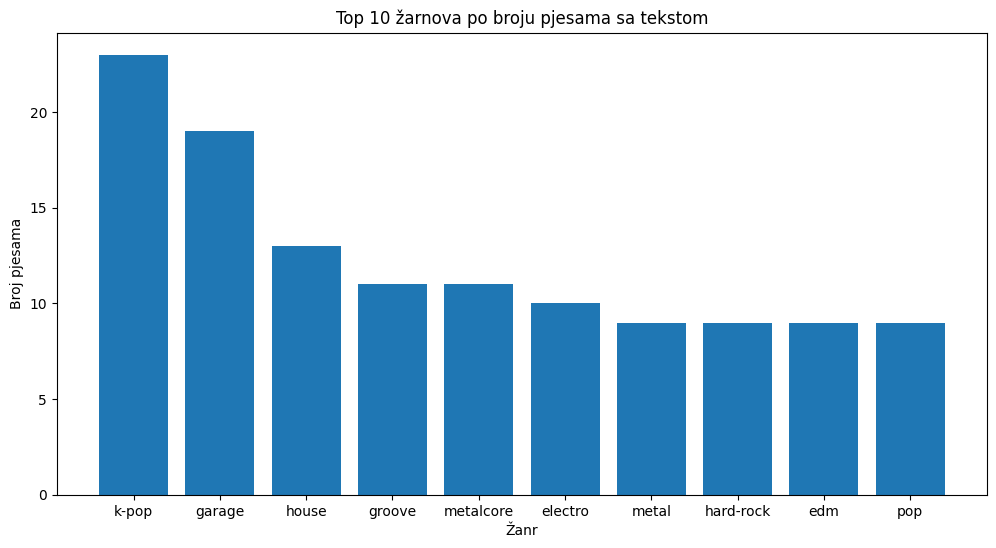

In [67]:
import matplotlib.pyplot as plt

top10 = df.sort_values("num_of_songs", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10["genre"], top10["num_of_songs"])
plt.title("Top 10 žarnova po broju pjesama sa tekstom")
plt.xlabel("Žanr")
plt.ylabel("Broj pjesama")
plt.show()

Vidimo da njaveći broj pjesama sa tekstom pripada žarnu "k-pop"

---

#### Prosječna popularnost prema eksplicitnosti sadržaja - avgPopu_explicit

```javascript

function map3() {
  var expli = this.track_info && this.track_info.explicit;
  var popu = this.track_info && this.track_info.popularity;

  emit(expli, { sum: popu, cnt: 1 });
}

function reduce3(kljuc, vrijednosti) {
  var r = { sum: 0, cnt: 0 };

  for (var i = 0; i < vrijednosti.length; i++) {
    r.sum += vrijednosti[i].sum;
    r.cnt += vrijednosti[i].cnt;
  }
  return r;
}

function finalize1(kljuc, r) {
  if (r.cnt == 0){
    return null;
  }
  return r.sum / r.cnt;
}

db.spotify_songs.mapReduce(
  map3,
  reduce3,
  {
    out: "avgPopu_explicit",
    finalize: finalize1
  }
)
```

In [68]:
mr = db["avgPopu_explicit"]
df = pd.DataFrame(list(mr.find()))
df = df.rename(columns={"_id": "explicit", "value": "avg_popularity"})
df.head()

,explicit,avg_popularity
0,False,32.852577
1,True,36.885644


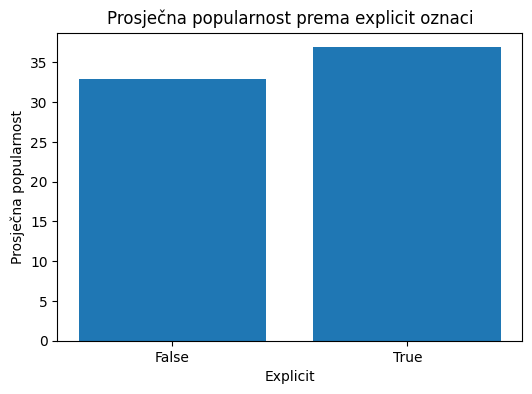

In [69]:
plt.figure(figsize=(6,4))
plt.bar(df["explicit"].astype(str), df["avg_popularity"])
plt.title("Prosječna popularnost prema explicit oznaci")
plt.xlabel("Explicit")
plt.ylabel("Prosječna popularnost")
plt.show()

Veću popularnost ima eksplicitni sadržaj

---

#### Prosječni danceability, loudnes i tempo po žarnu

```javascript

function map4(){
  var d = this.audio_features.danceability;
  var l = this.audio_features.loudness;
  var t = this.audio_features.tempo;
  if (d == null || l == null || t == null) return;

  for (var i in this.track_info.track_genre) {
    emit(this.track_info.track_genre[i], {dance_sum: d, loud_sum: l, tempo_sum: t, cnt: 1 });
  }
}

function reduce4(key, values) {
  var r = { dance_sum: 0, loud_sum: 0, tempo_sum: 0, cnt: 0 };

  for (var i in values) {
    r.dance_sum += values[i].dance_sum;
    r.loud_sum += values[i].loud_sum;
    r.tempo_sum += values[i].tempo_sum;
    r.cnt += values[i].cnt;
  }
  return r;
}

function finalize2(key, r) {
  return {
    avg_danceability: r.dance_sum / r.cnt,
    avg_loudness: r.loud_sum / r.cnt,
    avg_tempo: r.tempo_sum / r.cnt
  };
}

db.spotify_songs.mapReduce(
  map4,
  reduce4,
  {
    out: "avgFeat_Genre",
    finalize: finalize2
  }
)
```

In [73]:
mr = db["avgFeat_Genre"]
df = pd.DataFrame(list(mr.find()))
df.head()

,_id,value
0,power-pop,"{'avg_danceability': 0.4735230923694776, 'avg_..."
1,dance,"{'avg_danceability': 0.6876549222797927, 'avg_..."
2,malay,"{'avg_danceability': 0.6286036036036017, 'avg_..."
3,club,"{'avg_danceability': 0.6037408040201008, 'avg_..."
4,ambient,"{'avg_danceability': 0.3679657657657664, 'avg_..."


In [74]:
df[["avg_danceability", "avg_loudness", "avg_tempo"]] = df["value"].apply(pd.Series)

In [75]:
df.head()

,_id,value,avg_danceability,avg_loudness,avg_tempo
0,power-pop,"{'avg_danceability': 0.4735230923694776, 'avg_...",0.473523,-6.685470,134.603671
1,dance,"{'avg_danceability': 0.6876549222797927, 'avg_...",0.687655,-5.333689,120.436017
2,malay,"{'avg_danceability': 0.6286036036036017, 'avg_...",0.628604,-8.373361,119.300011
3,club,"{'avg_danceability': 0.6037408040201008, 'avg_...",0.603741,-6.884334,123.307086
4,ambient,"{'avg_danceability': 0.3679657657657664, 'avg_...",0.367966,-18.596266,111.156413


In [76]:
df = df.rename(columns={"_id": "genre"})
df = df[["genre", "avg_danceability", "avg_loudness", "avg_tempo"]]
df.head()

,genre,avg_danceability,avg_loudness,avg_tempo
0,power-pop,0.473523,-6.685470,134.603671
1,dance,0.687655,-5.333689,120.436017
2,malay,0.628604,-8.373361,119.300011
3,club,0.603741,-6.884334,123.307086
4,ambient,0.367966,-18.596266,111.156413


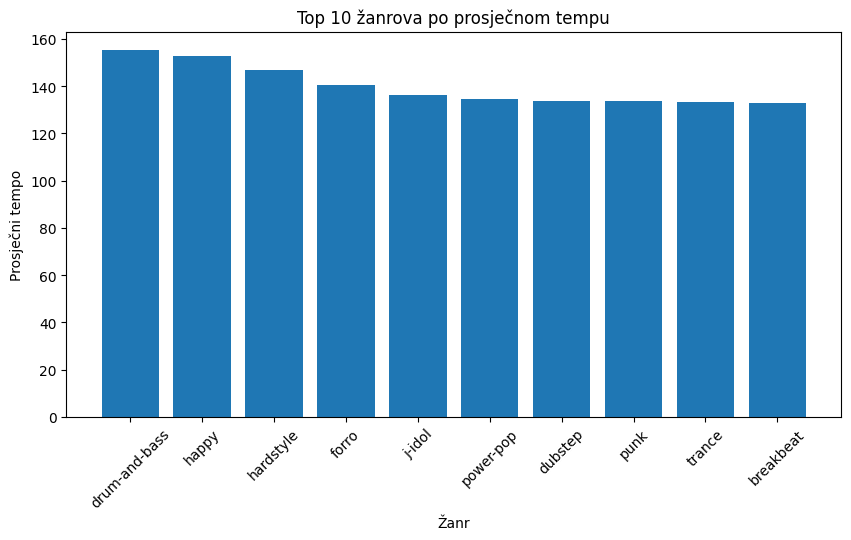

In [77]:
top10 = df.sort_values("avg_tempo", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10["genre"], top10["avg_tempo"])

plt.title("Top 10 žanrova po prosječnom tempu")
plt.xlabel("Žanr") 
plt.ylabel("Prosječni tempo")

plt.xticks(rotation=45)
plt.show()

In [78]:
df["avg_loudness"].describe()

count    114.000000
mean      -8.254970
std        3.384724
min      -24.194084
25%       -9.441359
50%       -7.351905
75%       -6.052320
max       -3.773913
Name: avg_loudness, dtype: float64

Najglasniji žarn ima -3.77 dB, dok najtiši žarn ima -24.19 dB. Prosječna glasnoća svih žarnova je -8.25 žarnova

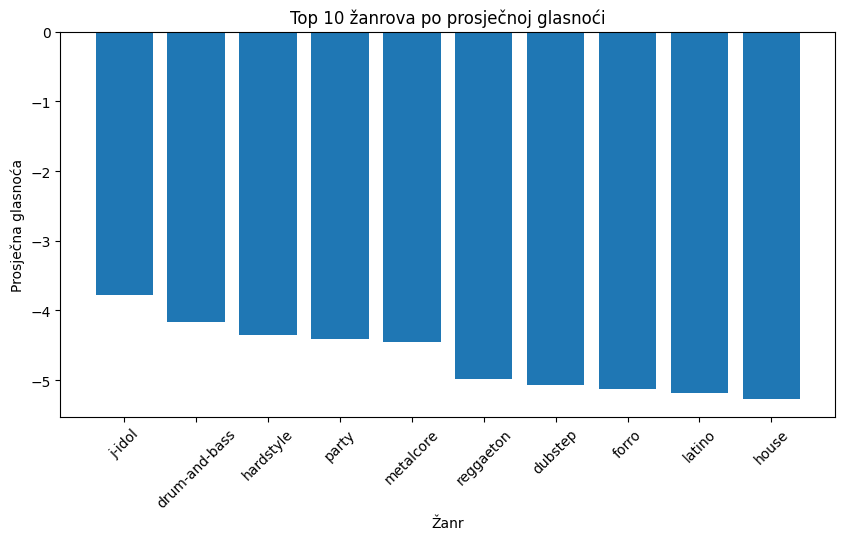

In [79]:
top10 = df.sort_values("avg_loudness", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10["genre"], top10["avg_loudness"])

plt.title("Top 10 žanrova po prosječnoj glasnoći")
plt.xlabel("Žanr")
plt.ylabel("Prosječna glasnoća")

plt.xticks(rotation=45)
plt.show()

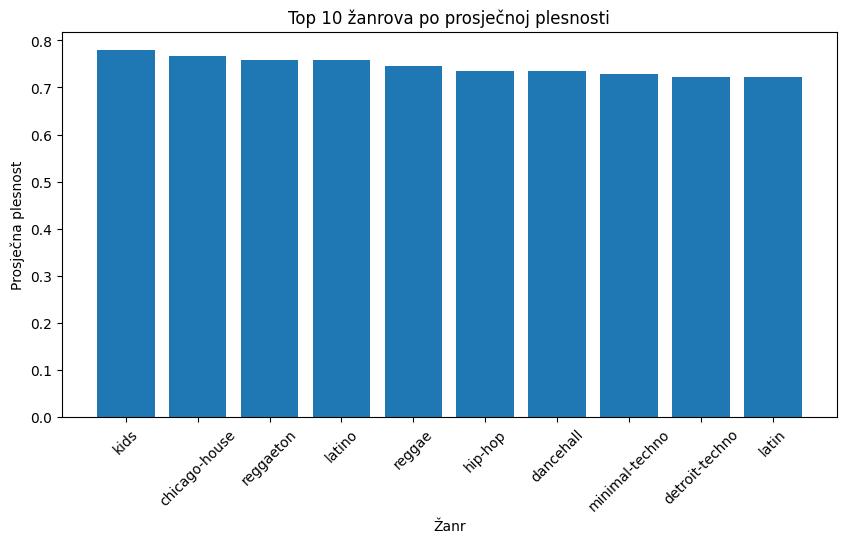

In [80]:
top10 = df.sort_values("avg_danceability", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top10["genre"], top10["avg_danceability"])

plt.title("Top 10 žanrova po prosječnoj plesnosti")
plt.xlabel("Žanr")
plt.ylabel("Prosječna plesnost")

plt.xticks(rotation=45)
plt.show()

---

#### Najčešće riječi u tekstu

Sto priječi sam našao ovdje: https://gist.github.com/sebleier/554280

```javascript
var stopWords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

function map5() {

  var lyrics = this.track_info.lyrics;
  if (!lyrics) return;

  var words = lyrics.toLowerCase().split(" ");

  for (var i in words) {

    var w = words[i];
    if (!w) continue;
    if (w.length < 3) continue;

    if(stopWords.includes(w)) continue;
    
    emit(w, 1);
  }
}

function reduce5(kljuc, vrijednosti) {
    return Array.sum(vrijednosti)
}

db.spotify_songs.mapReduce(
    map5,
    reduce5,
    {
        out: "topWords",
        scope: {stopWords: stopWords}
    }
)

```


In [81]:
mr = db["topWords"]
df = pd.DataFrame(list(mr.find()))
df.head()

,_id,value
0,faisait,10.0
1,star,12.0
2,european,1.0
3,butt,2.0
4,strive,1.0


In [82]:
df = df.rename(columns={"_id": "word", "value": "count"})

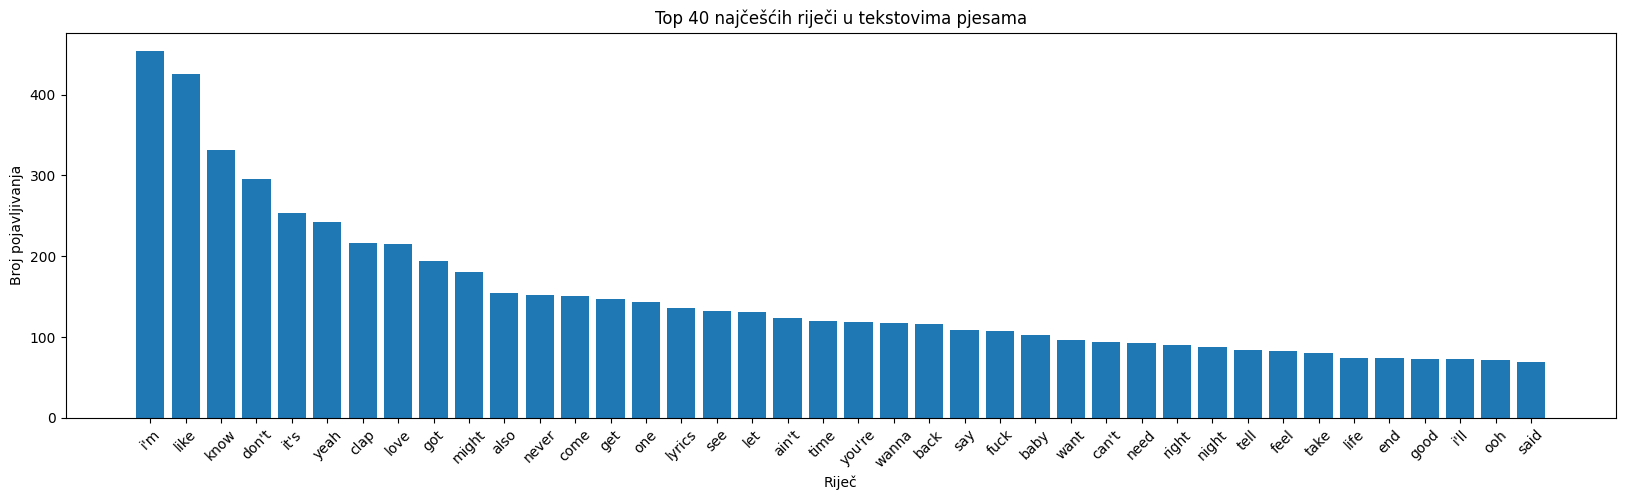

In [83]:
top40 = df.sort_values("count", ascending=False).head(40)
plt.figure(figsize=(20,5))
plt.bar(top40["word"], top40["count"])

plt.title("Top 40 najčešćih riječi u tekstovima pjesama")
plt.xlabel("Riječ")
plt.ylabel("Broj pojavljivanja")

plt.xticks(rotation=45)
plt.show()

---

---

---

# **The End**